In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import os_sorted
import json
import pickle
import pyabf
black_background = False # black background for slides
if black_background:
    plt.style.use('dark_background')
    
# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#root_path = Path('G:\\My Drive\\PhD\\Odor quality discrimination\\ephys\\analysis')
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys')
save_path = 'Declare path'

Or42a_Hex_path = Path(root_path, 'Or42aSF Hex\\step stim')

conc_to_use = [
    '4Hex3One 10000pM',
    '4Hex3One 1000000pM',
    '4HEx3One 100000000pM'
]

# extract PSTH

In [4]:
start_time = 23 # seconds after OB1 turned on
end_time = 25 # seconds after OB1 turned on

Or42a_Hex_mean_later, Or42a_Hex_odor_conc, \
    Or42a_Hex_std_later, Or42a_Hex_SEM_later = shared_functions.mean_spike_rate(
    Or42a_Hex_path,
    conc_to_use,
    start_time, end_time)

230000
4Hex3One 10000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF Hex\step stim\4Hex3One 10000pM\Or42aSF Hex_4Hex3One 10000pM.csv
4Hex3One 1000000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF Hex\step stim\4Hex3One 1000000pM\Or42aSF Hex_4Hex3One 1000000pM.csv
4HEx3One 100000000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF Hex\step stim\4HEx3One 100000000pM\Or42aSF Hex_4HEx3One 100000000pM.csv


In [5]:
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_subplot(111)

# plot Or42b EtB"""
conc_Or42a_Hex_beg = []
for i in range(len(Or42a_Hex_odor_conc)):
    conc_Or42a_Hex_beg.append(float((Or42a_Hex_odor_conc[i]).split('pM')[0].split(' ')[-1])/1e6)
    if i == 0:
        ax.scatter(conc_Or42a_Hex_beg[i], Or42a_Hex_mean_later[i], color = 'cyan', label = 'Or42a_Hex')
    else:
        ax.scatter(conc_Or42a_Hex_beg[i], Or42a_Hex_mean_later[i], color = 'cyan')
ax.errorbar(conc_Or42a_Hex_beg, Or42a_Hex_mean_later, yerr=Or42a_Hex_SEM_later, color='cyan')

ax.set_xlim(0.007, 120)
ax.set_ylim(-5,25)
 
ax.set_xscale('log')
ax.set_ylabel('Median firing rate [Hz]')
ax.set_xlabel('Concentration [uM]')
ax.legend()
ax.set_title('Mean with STD from ' + repr(start_time) + 's until ' + repr(end_time) +'s')
fig.savefig(Path(save_path, 'Fig4D_Or42a_Hex_Dose_response_late_YHIGH.svg'))

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Mean with STD from 23s until 25s')

# Example trace

<IPython.core.display.Javascript object>


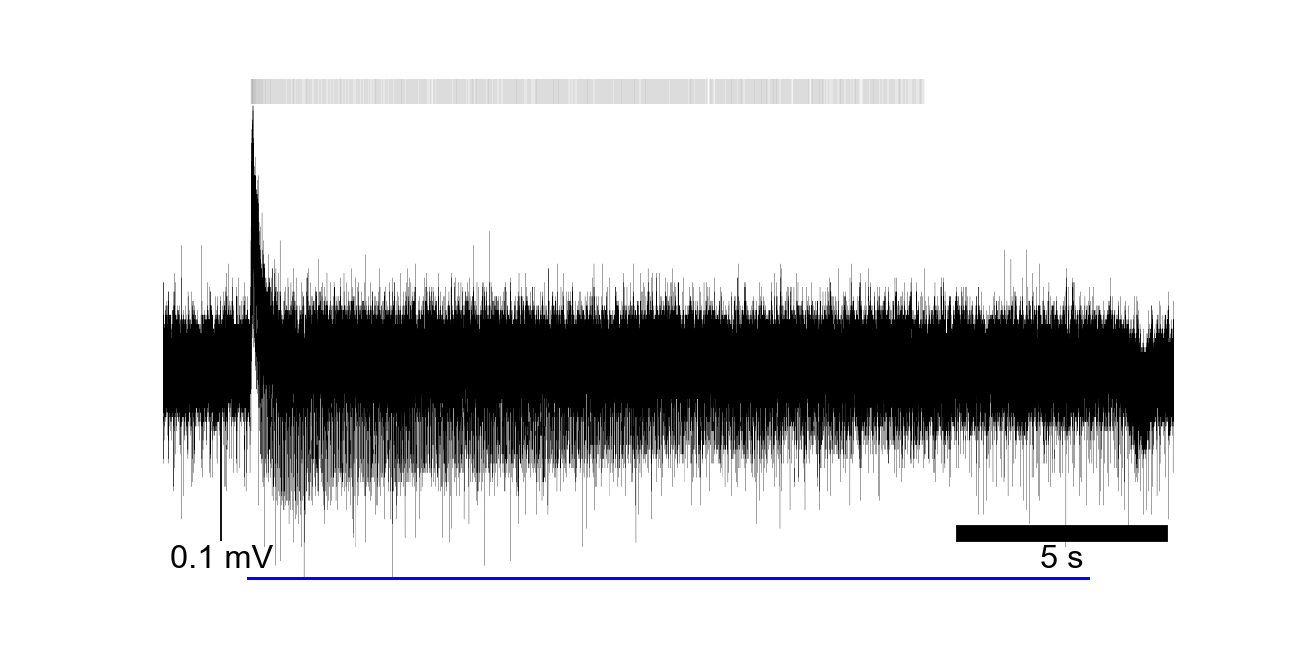

In [6]:
current_path = Path(root_path, 'Or42aSF Hex\\step stim\\4HEx3One 100000000pM\\20220212_16-18-12_pCh2_Ch2_4Hex3One100uM_200mbar')

shared_functions.collect_and_plot_ephys_traces(current_path, 'Fig4H_Or42aSF_Hex100uM_example.pdf', 
                                               save_path,  ylim=(-0.15,0.18),
                                               rasterplot_linethickness=0.05,
                                               #detailed_x1 = (start_phasic_100uM, end_phasic_100uM), detailed_x1_color = 'navy',
                                               #detailed_x2 = (start_tonic_100uM, end_tonic_100uM), detailed_x2_color = 'cyan',
                                               odor_color='blue'
                                              )